In [ ]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

In [ ]:
#Import libraries before starting
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from collections import Counter

In [ ]:
#--------  evaluate_test_set
# A function to evaluate the test set with a 0.05 threshold
# requires
#      numpy
# Input: 
#      x_test_1 (test var)
#      y_test_1 (y var)
#      prob (probabilty threshold)
def evaluate_test_set(x_test_1, y_test_1, prob = 0.05):
    
    y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
    y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
    y_pred[y_test_1_prob > prob] = 1
    
    # Calculate values
    false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
    false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
    
    # Printing
    print('Accuracy', np.mean(y_pred==y_test_1))
    print('Accuracy for class 0', np.mean((y_pred == y_test_1)[y_test_1==0]))
    print('Accuracy for class 1', np.mean((y_pred == y_test_1)[y_test_1==1]))
    print('\nFalse positives', len(false_positives))
    print('False negatives', len(false_negatives))

#--------  plot_values
# A function to plot the values with the different thresholds
# requires
#      numpy
#      mathplotlib
# Input: 
#      x_test_1 (test var)
#      y_test_1 (y var)
#      label (label values)
def plot_values(y_test_1, x_test_1, label):
    # Setup
    threshold = np.linspace(0, 1, 50)
    false_positive_rate = []
    true_positive_rate = []
    accuracy = []
    error_rate = []
    num_patients = len(y_test_1)
    y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
    positives = len(y_test_1[y_test_1 == 0])
    negatives = len(y_test_1[y_test_1 == 1])

    # Iterating
    for prob in threshold:
        y_test_1_prob = logitm.predict_proba(x_test_1)[:, 1]
        y_pred = np.zeros((len(y_test_1), 1)).reshape(-1)
        y_pred[y_test_1_prob > prob] = 1

        accuracy.append(np.mean(y_pred==y_test_1))
        false_negatives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 1 and y_test_1[i] == 0)]
        true_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 0)]
        false_positives = [i for i,x in enumerate(y_pred) if (y_pred[i] == 0 and y_test_1[i] == 1)]
        err_rate = len(false_negatives)/float(positives)
        true_pos_rate = (len(true_positives))/float(positives)
        false_pos = len(false_positives)/float(negatives)
        false_positive_rate.append(false_pos)
        true_positive_rate.append(true_pos_rate)
        error_rate.append(err_rate)
    
    # Ploting
    plt.figure(figsize=(18, 6))
    plt.plot(threshold, error_rate, label='False negative rate', linewidth=3, color="darkred", alpha = 0.7)
    plt.plot(threshold, true_positive_rate, label='True positive rate', linewidth=3, color="darkblue", alpha = 0.7)
    plt.plot(threshold, false_positive_rate, label='False positive rate', linewidth=3, color="black", alpha = 0.7)
    plt.legend(loc='best')
    plt.xlabel('Threshold probability'); plt.ylabel('Rate')
    plt.title(label)
    plt.grid()
    plt.show()


## 1: Importing Data

**Solution:**

In [ ]:
#Code here
train_data = pd.read_csv('dataset_3_train.txt')
test_data_1 = pd.read_csv('dataset_3_test_1.txt')
test_data_2 = pd.read_csv('dataset_3_test_2.txt')

## 2: Data exploration

**Solution:**

In [ ]:
train_data

,7.900000000000000000e+01,5.800000000000000000e+01,7.300000000000000000e+01,7.800000000000000000e+01,6.700000000000000000e+01,0.000000000000000000e+00
0,73.0,73.0,75.0,79.0,64.0,0.0
1,62.0,56.0,66.0,57.0,74.0,0.0
2,40.0,73.0,61.0,74.0,61.0,0.0
3,68.0,58.0,76.0,71.0,64.0,0.0
4,70.0,54.0,66.0,66.0,76.0,0.0
...,...,...,...,...,...,...
150,71.0,61.0,74.0,74.0,76.0,1.0
151,59.0,75.0,70.0,76.0,62.0,1.0
152,74.0,73.0,72.0,75.0,63.0,1.0
153,75.0,75.0,70.0,77.0,67.0,1.0


In [ ]:
#Code here
print("Train data shape:", train_data.shape)
print("Test data 1 shape:", test_data_1.shape)
print("Test data 2 shape:", test_data_2.shape)

print("Class distribution in train data:")
print(train_data.iloc[:, -1].describe())

Train data shape: (155, 6)
Test data 1 shape: (66, 6)
Test data 2 shape: (93, 6)
Class distribution in train data:
count    155.000000
mean       0.051613
std        0.221961
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: 0.000000000000000000e+00, dtype: float64


## 3: Cleaning the data

**Solution:**

In [ ]:
#Code here
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

x_test_1 = test_data_1.iloc[:, :-1]
y_test_1 = test_data_1.iloc[:, -1]

x_test_2 = test_data_2.iloc[:, :-1]
y_test_2 = test_data_2.iloc[:, -1]


x_train.columns = ['X1', 'X2','X3', 'X4','Diag']
x_test_1.columns=['X1', 'X2','X3', 'X4','Diag']
x_test_2.columns=['X1', 'X2','X3', 'X4','Diag']

## 4.  Modelling

**Solution:**

Test set 1:
Accuracy 0.8787878787878788
Accuracy for class 0 0.9354838709677419
Accuracy for class 1 0.0

False positives 4
False negatives 4

Test set 2:
Accuracy 0.5053763440860215
Accuracy for class 0 0.9347826086956522
Accuracy for class 1 0.0851063829787234

False positives 43
False negatives 3


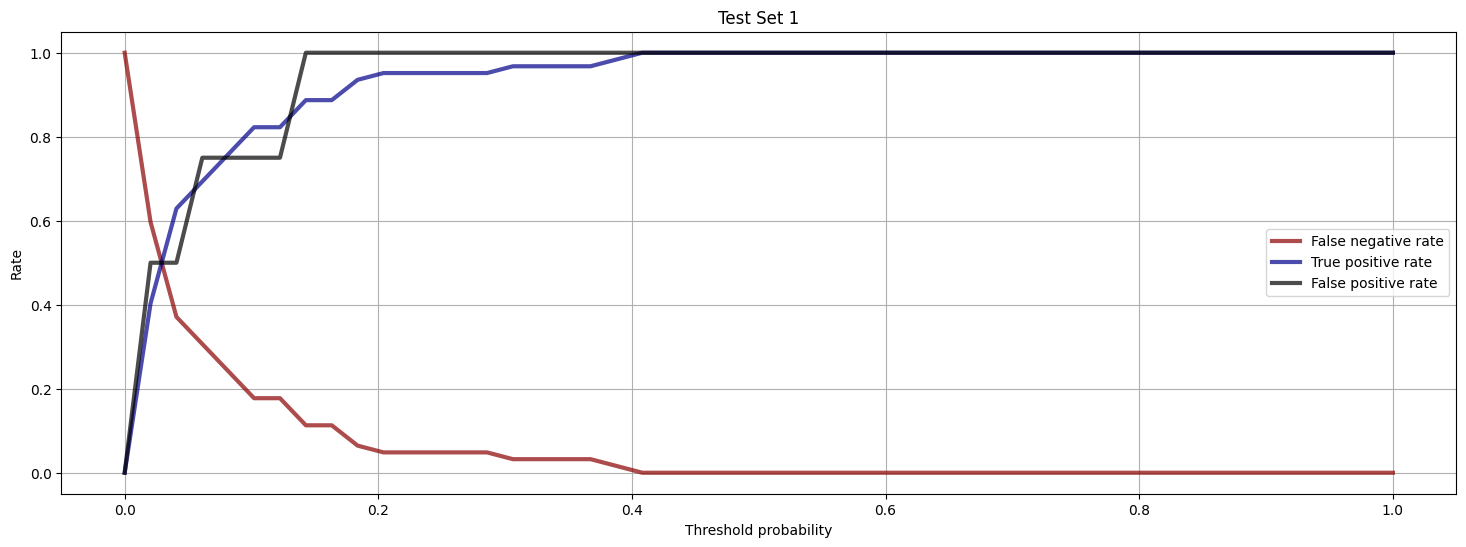

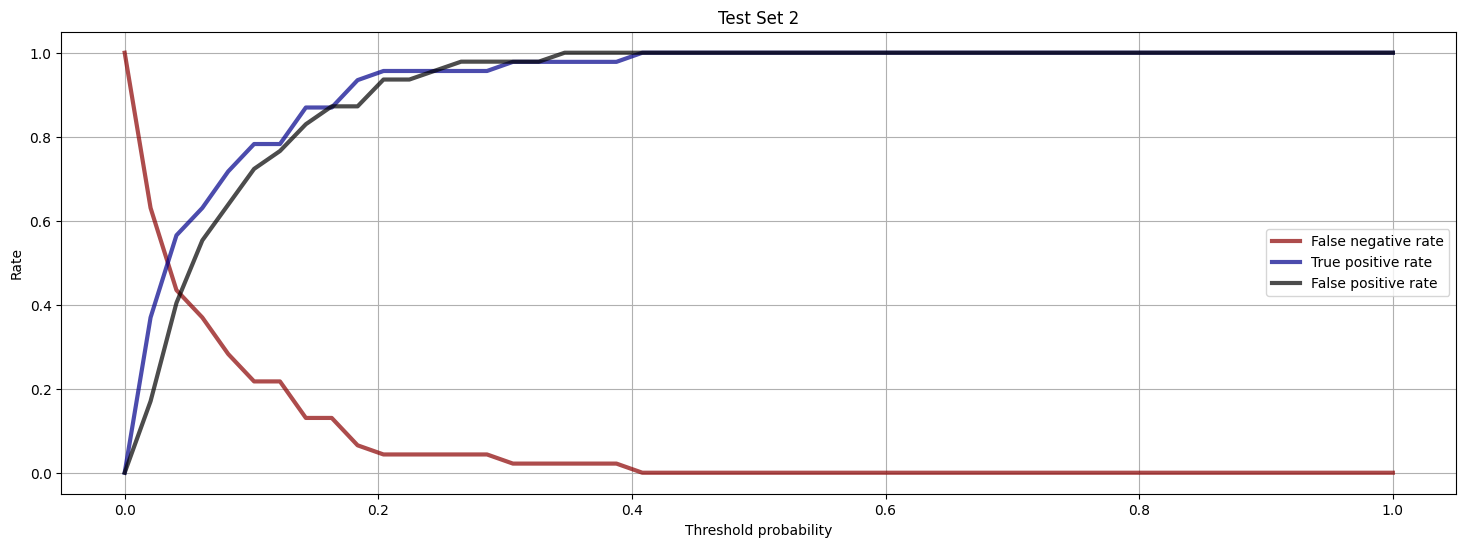

In [ ]:
#Code here
logitm = LogisticRegression()
logitm.fit(x_train, y_train)
print("Test set 1:")
evaluate_test_set(x_test_1, y_test_1, prob=0.2)
print("\nTest set 2:")
evaluate_test_set(x_test_2, y_test_2, prob=0.2)
plot_values(y_test_1, x_test_1, label='Test Set 1')
plot_values(y_test_2, x_test_2, label='Test Set 2')

## 5: New model with a smaller probability threshold (0.05)

Test set 1:
Accuracy 0.6515151515151515
Accuracy for class 0 0.6612903225806451
Accuracy for class 1 0.5

False positives 2
False negatives 21

Test set 2:
Accuracy 0.5698924731182796
Accuracy for class 0 0.5869565217391305
Accuracy for class 1 0.5531914893617021

False positives 21
False negatives 19


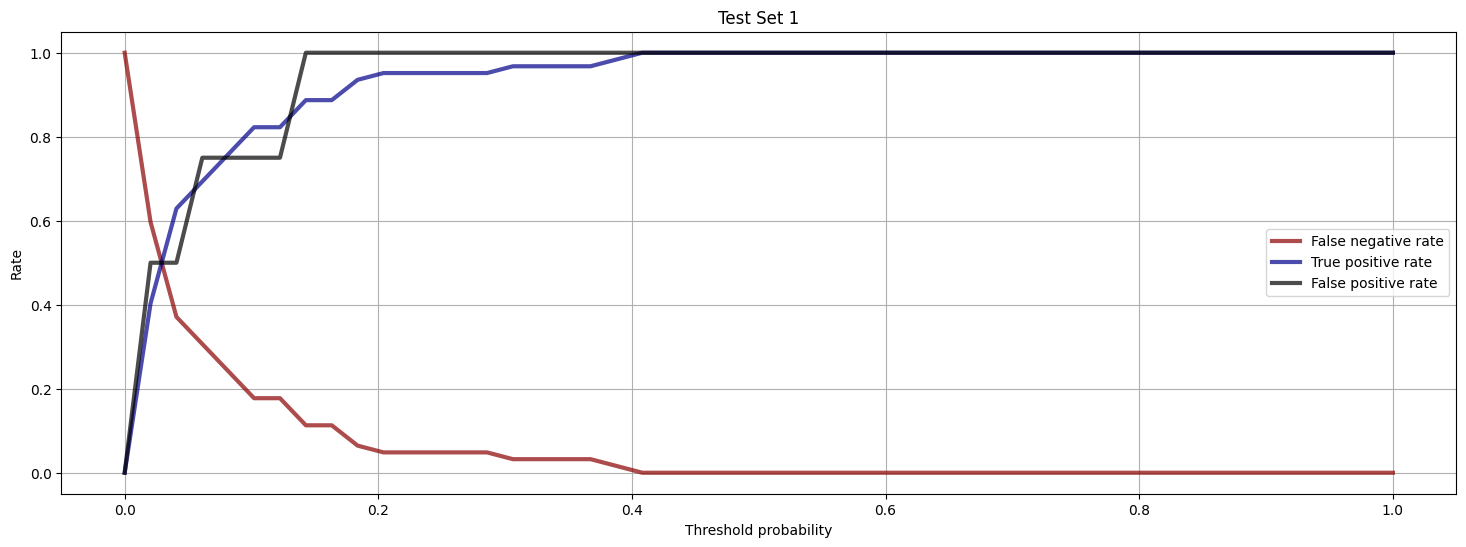

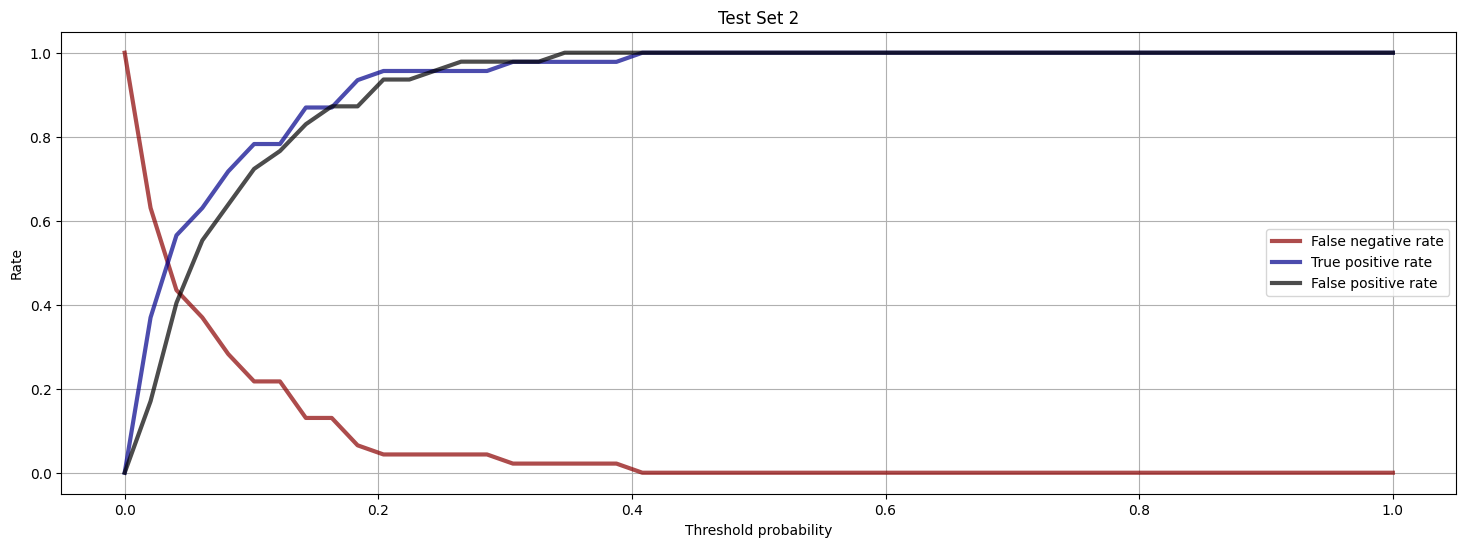

In [ ]:
#Code here
logitm = LogisticRegression()
logitm.fit(x_train, y_train)

print("Test set 1:")
evaluate_test_set(x_test_1, y_test_1, prob=0.05)

print("\nTest set 2:")
evaluate_test_set(x_test_2, y_test_2, prob=0.05)

plot_values(y_test_1, x_test_1, label='Test Set 1')
plot_values(y_test_2, x_test_2, label='Test Set 2')
